In [1]:
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

from colormath.color_objects import sRGBColor, LabColor
from colormath.color_conversions import convert_color

from matplotlib import pyplot as plt
%matplotlib inline

In [50]:
CSV = None

#Reading csv file with pandas and giving names to each column
def init_colors():
    print("初始化颜色")
    index=["en_name","l","a","b","cn_serie", "cn_name"]
    CSV = pd.read_csv('colors.csv', names=index, header=None)


if CSV is None:
    CSV = init_colors()

初始化颜色


In [ ]:
# 颜色转换
def to_lab(rgb):
    color_rgb = sRGBColor(rgb[0], rgb[1], rgb[2])
    color_lab = convert_color(color_rgb, LabColor)
    lab = color_lab.lab_l, color_lab.lab_a, color_lab.lab_b
    # print(rgb, {"L": lab[0], "A": lab[1], "B": lab[2]})
    return lab

# 两个lab颜色的欧几里得距离
def color_dist_lab(lab1, lab2):
    """ returns the squared euklidian distance between two color vectors in lab space """
    return sum((a-b)**2 for a, b in zip(lab1, lab2))

In [6]:
filename = "../Color/fen.jpg"

image = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor (image, cv2.COLOR_BGR2RGB)

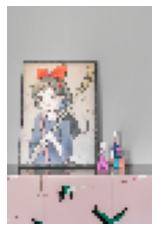

In [7]:
# 转成像素图
r, c = image.shape[:2]
out_r = 80
image = cv2.resize(image, (int(out_r*float(c)/r), out_r))
pixels = image.reshape((-1, 3))

plt.axis("off")
plt.imshow(image)

In [8]:
# 聚类
km = KMeans(n_clusters=8)
km.fit(pixels)

KMeans()

In [34]:
# 根据颜色和占比，计算主色
colors = np.asarray(km.cluster_centers_, dtype='uint8')
percentage = np.asarray(np.unique(km.labels_, return_counts = True)[1], dtype='float32')
percentage = percentage/pixels.shape[0]

dom = [[percentage[ix], colors[ix]] for ix in range(km.n_clusters)]
dominance = sorted(dom, key=lambda x:x[0], reverse=True)
dominance

[[0.4504717, array([184, 184, 184], dtype=uint8)],
 [0.2495283, array([210, 185, 186], dtype=uint8)],
 [0.103066035, array([226, 217, 211], dtype=uint8)],
 [0.06344339, array([159, 157, 163], dtype=uint8)],
 [0.05023585, array([100,  97,  98], dtype=uint8)],
 [0.048349056, array([132, 128, 133], dtype=uint8)],
 [0.025235849, array([40, 60, 55], dtype=uint8)],
 [0.009669811, array([240, 120,  91], dtype=uint8)]]

灰色系 雨灰色
粉色系 银粉色
灰色系 雾色
灰色系 银色
灰色系 钢灰色
灰色系 霜灰色
灰色系 魅影黑
橙色系 南瓜色


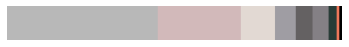

In [36]:
patch = np.zeros((50, 500, 3))

start = 0
for cx in range(km.n_clusters):
    width = int(dominance[cx][0] * patch.shape[1])
    end = start + width
#     cname, rgb = getColorName(*dominance[cx][1])
#     print(dominance[cx][1], cname, rgb)

    color = dominance[cx][1]
    lab1 = to_lab(color)
    _, idx = min([(color_dist_lab(lab1, (csv.loc[i, "l"], csv.loc[i, "a"], csv.loc[i, "b"])), i) for i in range(len(csv))])
    print(csv.loc[idx, "cn_serie"], csv.loc[idx, "cn_name"])
    
    patch[:, start:end, :] = color
    start = end

plt.figure(0)
plt.axis('off')    
plt.imshow(np.uint8(patch))
plt.show()

In [51]:
for rate, rgb in dominance:
    lab1 = to_lab(rgb)
    _, idx = min([(color_dist_lab(lab1, (csv.loc[i, "l"], csv.loc[i, "a"], csv.loc[i, "b"])), i) for i in range(len(csv))])
    print(rate, csv.loc[idx, "cn_serie"], csv.loc[idx, "cn_name"])


0.4504717 灰色系 雨灰色
0.2495283 粉色系 银粉色
0.103066035 灰色系 雾色
0.06344339 灰色系 银色
0.05023585 灰色系 钢灰色
0.048349056 灰色系 霜灰色
0.025235849 灰色系 魅影黑
0.009669811 橙色系 南瓜色
